In [259]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

# fossil fuel unit is million metric tons 1e12 gram C
# unit PgC is 1e15 gram C
# 1ppm CO2 is 2.13 PgC/GtC
gamma_pd =pd.read_csv('global.1751_2014.csv',index_col= ['Year'])

# Spline interpolation
gamma = UnivariateSpline(gamma_pd.index, gamma_pd['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'], k=3)
gamma.set_smoothing_factor(0.5)

# method to solve ODE questions

In [257]:
def dmove(Point,t,sets):

    k12,k21,gamma = sets
    gamma_t =gamma(t+1986)*1e-3
    n1,n2 = Point
    return np.array([ -k12*n1+k21*n2+gamma_t, k12*n1-k21*n2])

def move(Point,t,sets):

    k12,k21,gamma,sita,n02 = sets
    gamma_t =gamma(t+1986)*1e-3
    n1,n2 = Point
    return np.array([ -k12*n1+k21*(n02+sita*(n2-n02))+gamma_t, k12*n1-k21*(n02+sita*(n2-n02))])

# from 1986 to 2007
t = np.arange(0,20,1)

## plot Q1

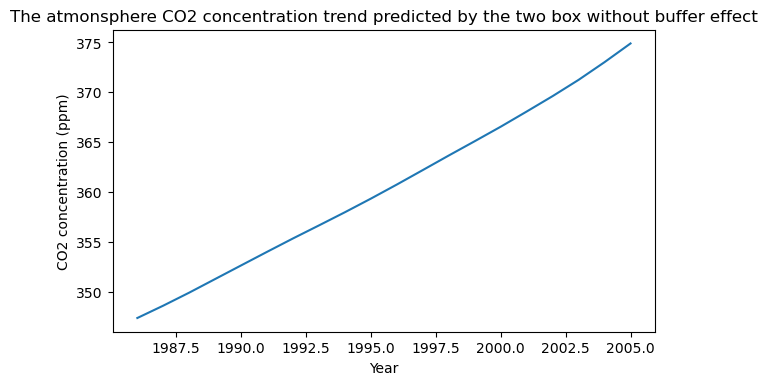

In [229]:
P1 = odeint(dmove,(740,900),t,args = ([105/740,102/900,gamma],))[:,0]/2.13 

# plot
fig =plt.figure(figsize=(7,4),dpi =100)
plt.plot(t+1986,P1)
plt.title('The atmonsphere CO2 concentration trend predicted by the two box without buffer effect')
plt.ylabel('CO2 concentration (ppm)')
plt.xlabel('Year')
plt.show()

## plot Q2

set buffer effect as 0.95

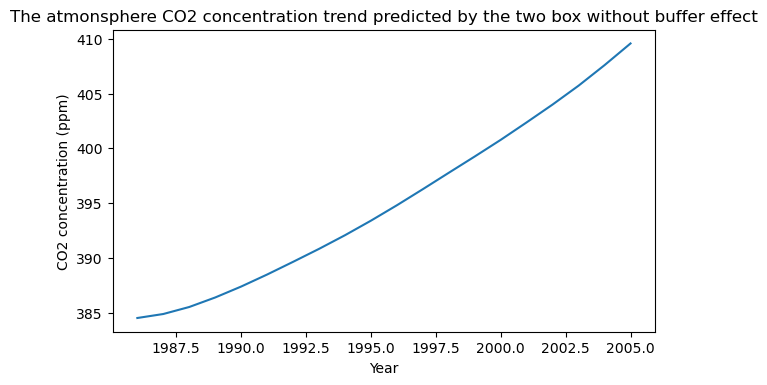

In [258]:
buff =0.95
P2 = odeint(move,(740+79,900-97),t,args = ([105/(740+79),102/(900-79),gamma,buff,821],))[:,0]/2.13

# plot
fig =plt.figure(figsize=(7,4),dpi =100)
plt.plot(t+1986,P2)
plt.title('The atmonsphere CO2 concentration trend predicted by the two box without buffer effect')
plt.ylabel('CO2 concentration (ppm)')
plt.xlabel('Year')
plt.show()

## plot Q3

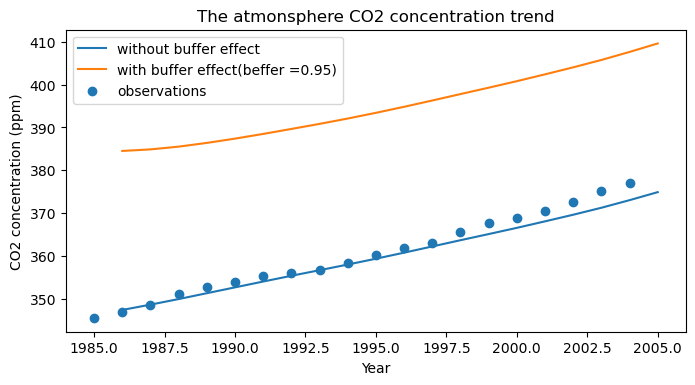

In [235]:
obs =pd.read_csv('co2_annmean_gl.csv', skiprows= [1,2,3,4,5,6], nrows= 20)
# print(obs.head(10))
# plot
fig =plt.figure(figsize=(8,4),dpi =100)
plt.scatter(obs.year, obs.Mean, label ='observations')
plt.plot(t+1986,P1, label ='without buffer effect')
plt.plot(t+1986,P2, label ='with buffer effect(beffer =0.95)')
plt.title('The atmonsphere CO2 concentration trend')
plt.ylabel('CO2 concentration (ppm)')
plt.xlabel('Year')
plt.legend()
plt.show()

## Q4

cannot find $\sigma$ dataset( emission rate to the atmonsphere by changes in land use)

In [242]:
def sevenBox(Point,t,sets):

    k12,k21,k23,k24,k32,k34,k43,k45,k51,k67,k71, n02,f,sigma,sita,gamma = sets
    gamma_t =gamma(t+1751)*1e-3
    n1,n2,n3,n4,n5,n6,n7 = Point
    return np.array([ -k12*n1+k21*(n02+sita*(n2-n02))+gamma_t-f+sigma+k51*n5+k71*n7, 
                        k12*n1-k21*(n02+sita*(n2-n02))-k23*n2+k32*n3-k24*n2,
                        k23*n2-k32*n3-k34*n3+k43*n4,
                        k34*n3-k43*n4+k24*n2-k45*n4,
                        k45*n4-k51*n5,
                        f-k67*n6-2*sigma,
                        k67*n6-k71*n7+sigma
                        ])

t2 =np.arange(0,260,1)

In [251]:
P3 = odeint(sevenBox,
            (615,842,9744,26280,90000000,731,1238),
            t2,
            args = ([60/615, 60/842, 9/842, 43/842, 52/9744, 162/9744, 205/26280, 0.2/26280, 0.2/90000000, 62/731, 62/1328,
                        842,62, 0.7,0.38, gamma,],)
            )[:,0]/2.13  

P4 = odeint(sevenBox,
            (615,842,9744,26280,90000000,731,1238),
            t2,
            args = ([60/615, 60/842, 9/842, 43/842, 52/9744, 162/9744, 205/26280, 0.2/26280, 0.2/90000000, 62/731, 62/1328,
                        842,62, 0.8,0.5, gamma,],)
            )[:,0]/2.13  

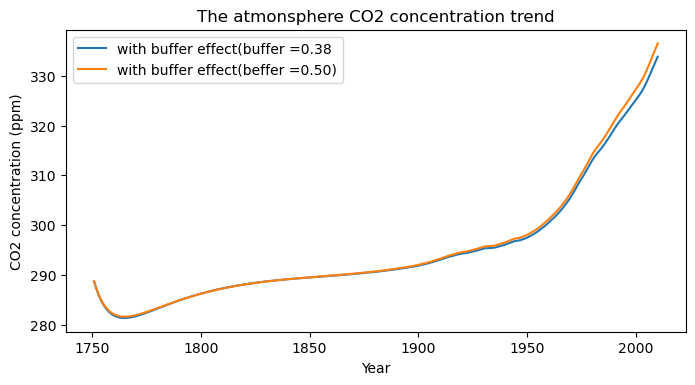

In [255]:
fig =plt.figure(figsize=(8,4),dpi =100)
plt.plot(t2+1751,P3, label ='with buffer effect(buffer =0.38')
plt.plot(t2+1751,P4, label ='with buffer effect(beffer =0.50)')
plt.title('The atmonsphere CO2 concentration trend')
plt.ylabel('CO2 concentration (ppm)')
plt.xlabel('Year')
plt.legend()
plt.show()